# S27 : Introduction to Matplotlib 

## by Farzad Minooei


## Matplotlib

Check the link: https://matplotlib.org/

Check the link: https://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns

In [2]:
#import mtcars dataset
df = pd.read_csv('mtcars.csv')

In [3]:
df.shape

(32, 12)

In [4]:
df.head()

,vehicle,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Data Visualization with Mtplotlib

### Scatter Plot 

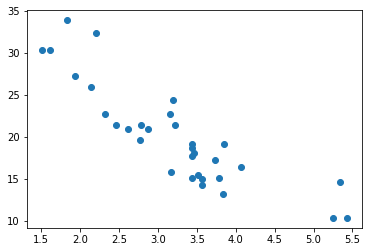

In [5]:
#Simple scatter plot: wt vs. mpg
plt.scatter(x = df['wt'], y = df['mpg'])

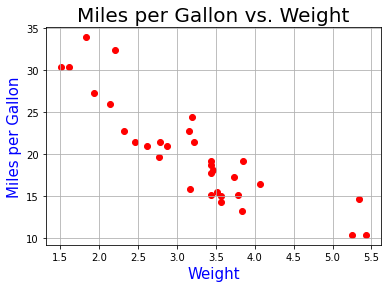

In [6]:
#Add ttile, axis label, add grid and change color
plt.scatter(x = df['wt'], y = df['mpg'], color = 'red')
plt.title('Miles per Gallon vs. Weight', fontsize = 20)
plt.xlabel('Weight', fontsize = 15, color = 'blue')
plt.ylabel('Miles per Gallon', fontsize = 15, color = 'blue')
plt.grid()

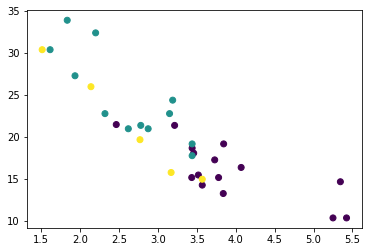

In [7]:
#Scatter Plot with a Third Variable
plt.scatter(x = df['wt'], y = df['mpg'], c = df['gear'])

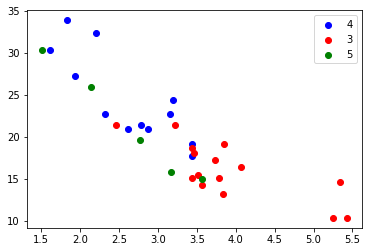

In [8]:
#Add legend
cdict = {3: 'red', 4: 'blue', 5: 'green'}
for i in df['gear'].unique():
    df_g = df.loc[df['gear'] == i, ]
    plt.scatter(x = df_g['wt'], y = df_g['mpg'], c = cdict[i], label = i)
plt.legend()

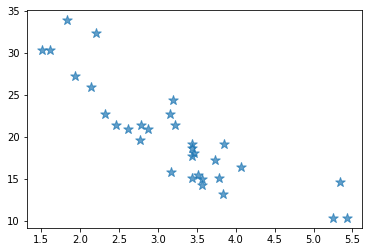

In [9]:
#Change Size and Shape of Points
plt.scatter(x = df['wt'], y = df['mpg'], s = 100, alpha = 0.7, marker = '*')

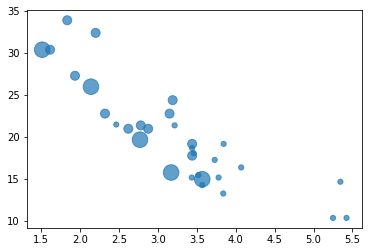

In [10]:
#Scatter Plot with a Third Variable(Size)
plt.scatter(x = df['wt'], y = df['mpg'], s = 3 ** df['gear'], alpha = 0.7)

Text(4.5, 20, 'Sample Lable!')

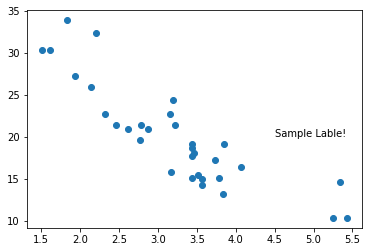

In [11]:
#Add lable to Plot
plt.scatter(x = df['wt'], y = df['mpg'])
plt.text(4.5, 20,'Sample Lable!')

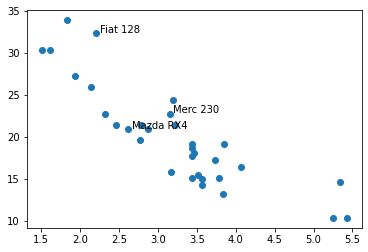

In [12]:
#Add Annotation to Plot
plot_labels = ["Mazda RX4", "Merc 230", "Fiat 128"]
x = df.loc[df['vehicle'].isin(plot_labels), 'wt']
y = df.loc[df['vehicle'].isin(plot_labels), 'mpg']
x.index = range(len(x))
y.index = range(len(y))
plt.scatter(x = df['wt'], y = df['mpg'])
for i in range(len(plot_labels)):
    plt.annotate(plot_labels[i], (x[i] + 0.05, y[i] + 0.05))

<AxesSubplot:xlabel='wt', ylabel='mpg'>

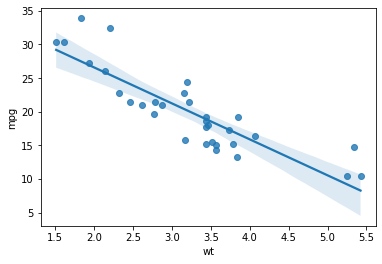

In [13]:
#Add Regression Line to Scatter Plot
sns.regplot(x = 'wt', y = 'mpg', data = df)

([<matplotlib.axis.YTick at 0x121534d1f10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

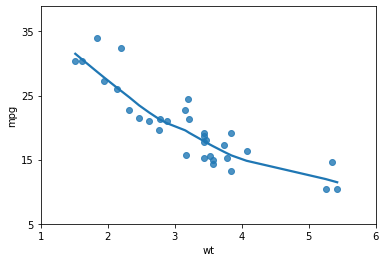

In [14]:
#Add Kernel Smoother Using LOWESS Method
sns.regplot(x = 'wt', y = 'mpg', data = df, lowess = True)
#Change axis values
plt.xlim(1, 6)
plt.ylim(df['mpg'].min() - 5, df['mpg'].max() + 5)
plt.yticks(np.arange(round(df['mpg'].min() - 5), round(df['mpg'].max() + 5), step = 10))

Text(0, 0.5, 'Mile per Gallon')

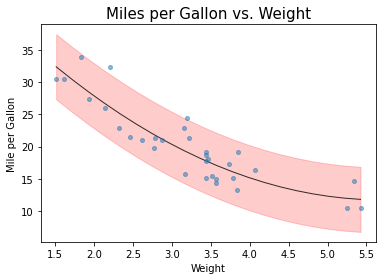

In [15]:
#Add Quadratice Regression
x = df['wt']
y = df['mpg']
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'black', alpha = 0.8, linewidth = 1)
plt.plot(x, y, 'o', markersize = 4, alpha = 0.5)
#assume standard deviation of errors is constant and normally distributed
sd_err = np.std(y - np.polyval(params, x))
#For normal distribution: Pr(mu - 2 sigma < X < mu + 2 sigma) = 95.45%
plt.fill_between(xp, yp - 2 * sd_err, yp + 2 * sd_err, color = 'red', alpha = 0.2) 
plt.title('Miles per Gallon vs. Weight', fontsize = 15)
plt.xlabel('Weight')
plt.ylabel('Mile per Gallon')

Text(0, 0.5, 'Miles per Gallon')

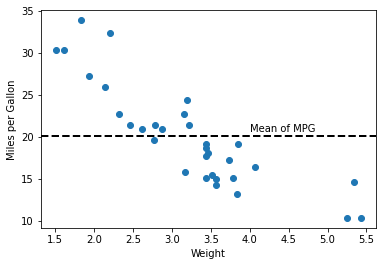

In [16]:
#Add Horizontal line
plt.scatter(x = df['wt'], y = df['mpg'])
plt.axhline(df['mpg'].mean(), color = 'black', linewidth = 2, linestyle = '--')
plt.text(4, df['mpg'].mean() + 0.5,'Mean of MPG', color = 'black')
plt.xlabel('Weight', fontsize = 10)
plt.ylabel('Miles per Gallon', fontsize = 10)

### Bar Chart

Text(0.5, 1.0, 'Dist. of Vehicles \n based on # of Geares')

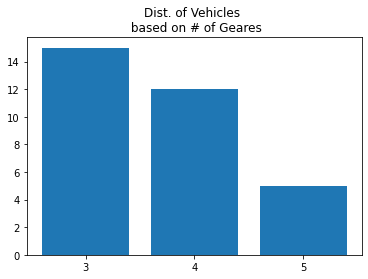

In [17]:
#Bar Chart based on Frequency
freq = df['gear'].value_counts()
freq
plt.bar(freq.index, freq.values)
plt.xticks(freq.index)
plt.title('Dist. of Vehicles \n based on # of Geares')

(array([0, 1, 2]), [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5')])

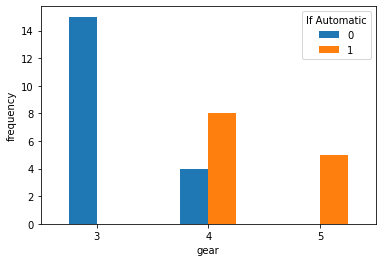

In [18]:
#Grouped and Stacked Bar Chart
df_grouped = pd.crosstab(df['gear'], df['am'])
df_grouped
df_grouped.plot.bar(stacked = False)
plt.legend(title = 'If Automatic')
plt.ylabel('frequency')
plt.xticks(rotation = 0)

([<matplotlib.axis.XTick at 0x12153b74610>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

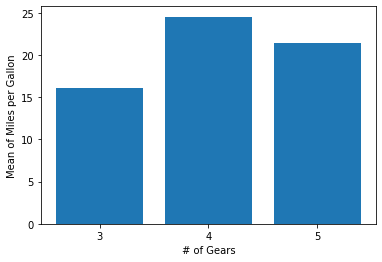

In [19]:
#Bar Plot Mean of MPG vs. # of Gears
df_grouped = df.groupby("gear")['mpg'].mean().reset_index()
df_grouped
plt.bar(df_grouped['gear'], df_grouped['mpg'])
plt.xlabel('# of Gears')
plt.ylabel('Mean of Miles per Gallon')
plt.xticks(df_grouped['gear'])

### Histogram

In [20]:
#Create a Dataset
wdata = pd.DataFrame({'sex'   : np.concatenate([np.repeat('F', 200), np.repeat('M', 200)]),
                     'weight' : np.concatenate([np.random.normal(loc = 65, scale = 5, size = 200),
                                np.random.normal(loc = 80, scale = 8, size = 200)])})
wdata.head(5)

,sex,weight
0,F,61.853143
1,F,56.088899
2,F,66.793155
3,F,66.787025
4,F,63.944070


Text(0, 0.5, 'Frequency')

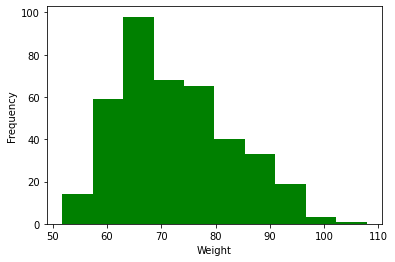

In [21]:
#Plot Histogram
plt.hist(wdata['weight'], color = 'green')
plt.xlabel('Weight')
plt.ylabel('Frequency')

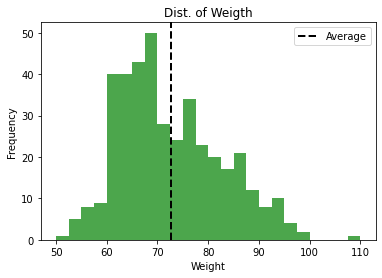

In [22]:
#Add Mean Value
plt.hist(wdata['weight'], color = 'green', alpha = 0.7, bins = np.linspace(50, 110, 25))
plt.axvline(wdata['weight'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Dist. of Weigth')
plt.legend()

<AxesSubplot:xlabel='weight', ylabel='Probability'>

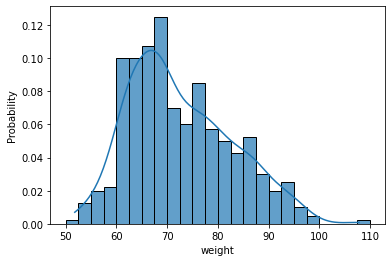

In [23]:
#Kernel Density Estimates (KDE)
sns.histplot(wdata['weight'], stat = 'probability', kde = True, alpha = 0.7, bins = np.linspace(50, 110, 25))

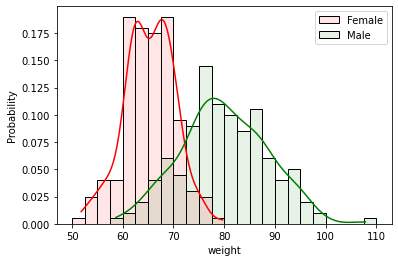

In [24]:
#Density Function for Two Groups
sns.histplot(wdata.loc[wdata['sex'] == 'F', 'weight'], stat = 'probability', kde = True, 
             alpha = 0.1, bins = np.linspace(50, 110, 25), color = 'red', label = 'Female')
sns.histplot(wdata.loc[wdata['sex'] == 'M', 'weight'], stat = 'probability', kde = True, 
             alpha = 0.1, bins = np.linspace(50, 110, 25), color = 'green', label = 'Male')
plt.legend()

In [25]:
#Two-dimensional Histogram
np.random.seed(123)
mean = [0, 0]
cov  = [[1, 1], [1, 2]]
data = np.random.multivariate_normal(mean, cov, 1000)
data

array([[ 0.39915702,  1.81829951],
       [ 0.55119011, -0.87891131],
       [-0.3760248 ,  1.33295918],
       ...,
       [-2.0161492 , -2.26801649],
       [ 1.14155645,  1.42469852],
       [ 1.36215422,  2.21996439]])

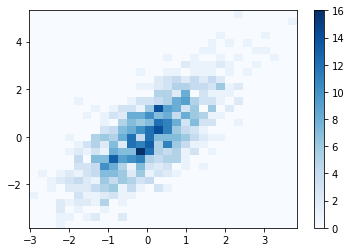

In [26]:
plt.hist2d(data[:, 0], data[:, 1], bins = 30, cmap = 'Blues')
plt.colorbar()

### Box Plot

Text(0.5, 1.0, 'Boxplot of Weight')

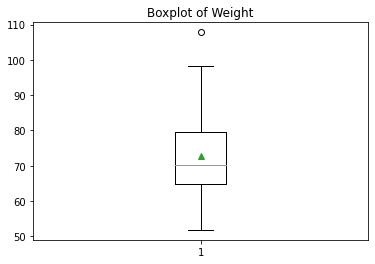

In [27]:
#Box Plot
plt.boxplot(wdata['weight'], showmeans = True)
plt.title('Boxplot of Weight')

<AxesSubplot:xlabel='sex', ylabel='weight'>

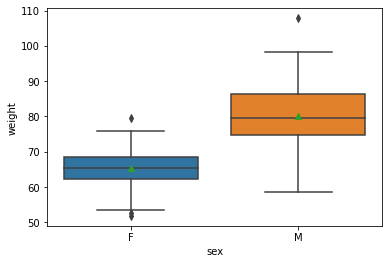

In [28]:
#Boxplot for Two Groups
sns.boxplot(x = 'sex', y = 'weight', data = wdata, showmeans = True)

### Pie Chart


In [29]:
freq = df['gear'].value_counts()
percentage = freq / freq.sum() * 100
percentage

3    46.875
4    37.500
5    15.625
Name: gear, dtype: float64

([<matplotlib.patches.Wedge at 0x12154fa4b50>,
 [Text(0.10781885436251686, 1.0947031993394165, '3'),
  Text(-0.6111272563215624, -0.9146165735327998, '4'),
  Text(0.9701133907831904, -0.5185364105085978, '5')])

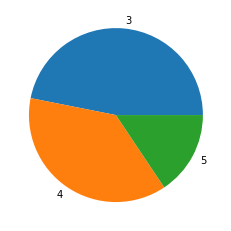

In [30]:
#Plot Pie Chart
plt.pie(percentage, labels = percentage.index)

Text(0.0, 1.0, 'Percentage of Vehciles \n based on # of Gears')

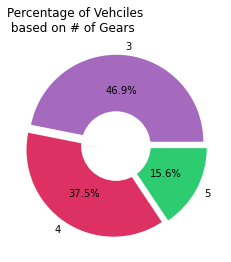

In [31]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index,  
        colors = ['#a569bd', '#DE3163', '#2ecc71'], autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('Percentage of Vehciles \n based on # of Gears', loc = 'left', fontsize = 12)

### Subplots

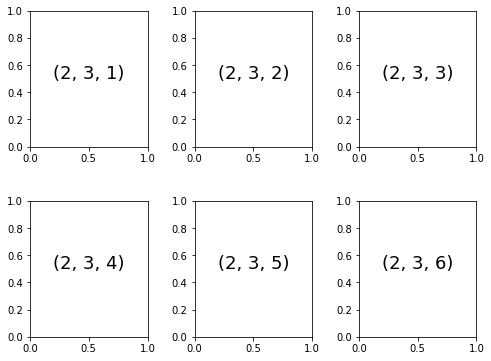

In [32]:
#Simple Grids of Subplots
plt.figure(figsize = (8, 6))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize = 18, ha = 'center')

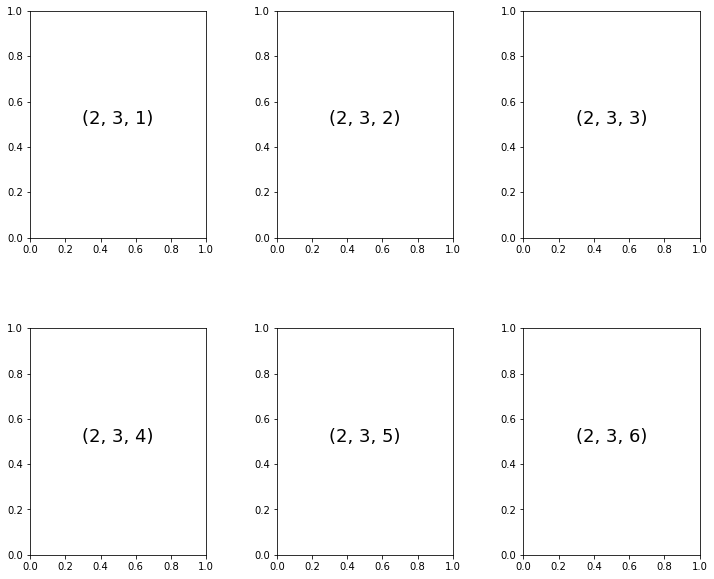

In [33]:
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 7):
    a = plot.add_subplot(2, 3, i)
    a.text(0.5, 0.5, str((2, 3, i)),
           fontsize = 18, ha = 'center')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   vehicle  32 non-null     object 
 1   mpg      32 non-null     float64
 2   cyl      32 non-null     int64  
 3   disp     32 non-null     float64
 4   hp       32 non-null     int64  
 5   drat     32 non-null     float64
 6   wt       32 non-null     float64
 7   qsec     32 non-null     float64
 8   vs       32 non-null     int64  
 9   am       32 non-null     int64  
 10  gear     32 non-null     int64  
 11  carb     32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


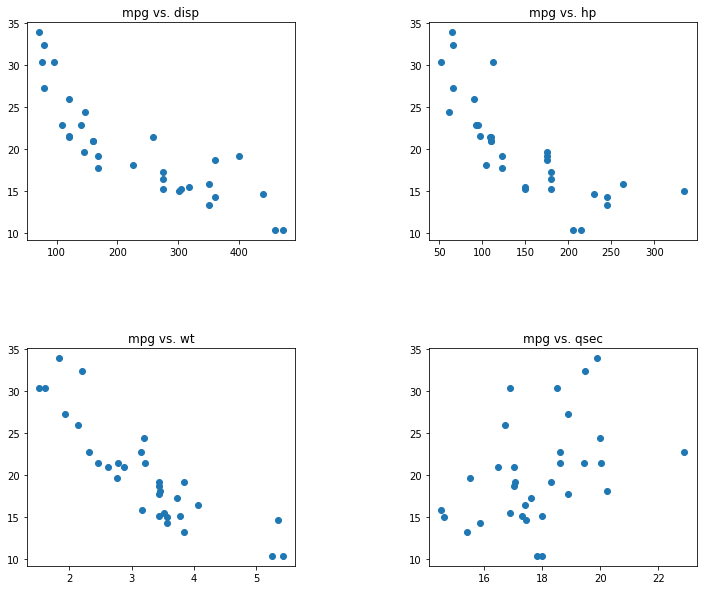

In [35]:
var_ind = [3, 4, 6, 7]
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 5):
    a = plot.add_subplot(2, 2, i)
    a.scatter(x = df.iloc[: , var_ind[i - 1]], y = df['mpg'])
    a.title.set_text('mpg vs. ' + df.columns[var_ind[i - 1]])

# End of Code